In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('House-Price-Prediction-clean.csv')

print("Data Information:")
data.info()
print("\nData Head:")
print(data.head())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null  

In [3]:
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'YearBuilt']
target = 'SalePrice'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iterations=2000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        if isinstance(y, pd.Series):
            y = y.values

        for i in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            cost = (1 / (2 * n_samples)) * np.sum((y_predicted - y)**2)
            self.cost_history.append(cost)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

def rmse(y_true, y_predicted):
    return np.sqrt(np.mean((y_true - y_predicted)**2))

In [5]:
regressor_scratch = LinearRegression(learning_rate=0.01, n_iterations=3000)
regressor_scratch.fit(X_train_scaled, y_train)


predictions_scratch = regressor_scratch.predict(X_test_scaled)
rmse_scratch = rmse(y_test, predictions_scratch)


print("--- From-Scratch Model Evaluation ---")
print(f"Root Mean Squared Error: ${rmse_scratch:,.2f}\n")

print("--- Learned Parameters ---")
print(f"Weights (Coefficients): {regressor_scratch.weights}")
print(f"Bias (Intercept): {regressor_scratch.bias:,.2f}\n")


example_house_original = X_test.iloc[100]
example_house_scaled = scaler.transform(example_house_original.values.reshape(1, -1))
predicted_price_scratch = regressor_scratch.predict(example_house_scaled)
actual_price = y_test.iloc[100]

print("--- Example Prediction ---")
print(f"Features of the house:\n{example_house_original.to_string()}\n")
print(f"Predicted Price: ${predicted_price_scratch[0]:,.2f}")
print(f"Actual Price: ${actual_price:,.2f}")

--- From-Scratch Model Evaluation ---
Root Mean Squared Error: $32,646.45

--- Learned Parameters ---
Weights (Coefficients): [27561.91297063 28130.31934134 12459.35272441 11350.63048128
  9419.99068487]
Bias (Intercept): 181,528.61

--- Example Prediction ---
Features of the house:
GrLivArea      1144
OverallQual       5
TotalBsmtSF    1144
GarageCars        1
YearBuilt      1956

Predicted Price: $125,258.38
Actual Price: $129,000.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


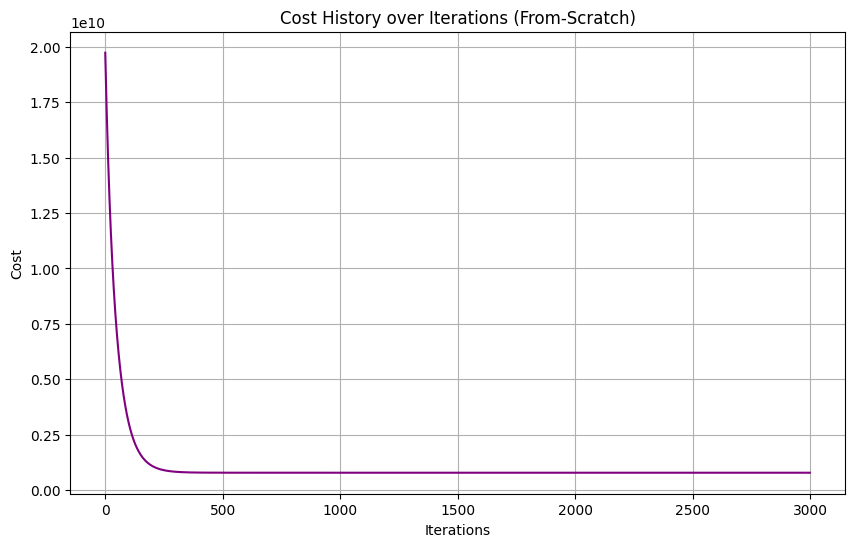

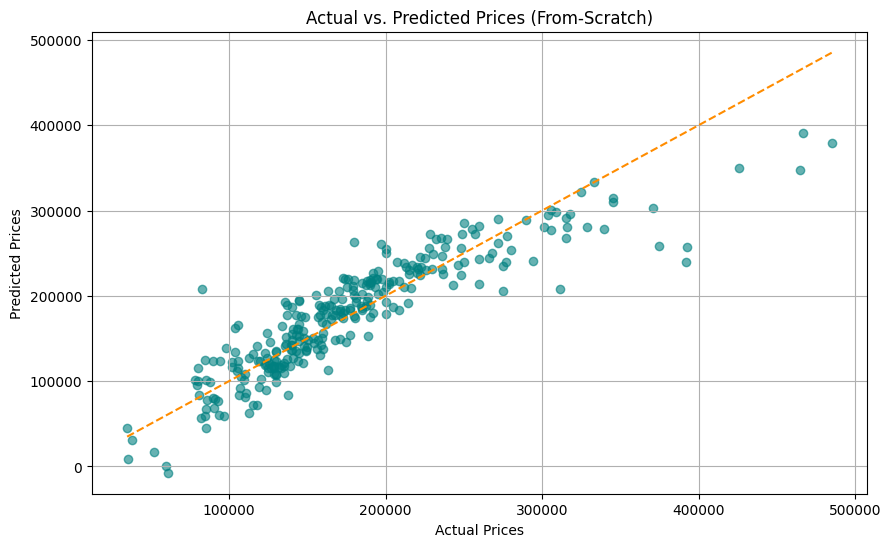

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(regressor_scratch.cost_history, color='purple')
plt.title("Cost History over Iterations (From-Scratch)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_scratch, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='darkorange', linestyle='--')
plt.title("Actual vs. Predicted Prices (From-Scratch)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.show()